# Nividia Stock Predcition w/ Linear Regression ML

This project aims to initially predict the current day, THEN makes some feature adjustments to predict the next day NVIDIA stock prices using linear regression, feature engineering, and machine learning. Using Matplotlib for visualization. This project serves as notes on these topics, findings, and code blocks required for prediction. 

In [58]:
# Imports
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Set a style for the plots
plt.style.use('seaborn-v0_8-darkgrid')

# Fetch Data

Grabbing stock data for NVDA from yFinance

In [59]:
# Define for NVIDIA
ticker_symbol = "NVDA"

# Start and end dates for the historical data
start_date = "2020-01-01"
end_date = datetime.date.today()

# Download stock data using yfinance
print(f"Downloading data for {ticker_symbol} from {start_date} to {end_date}")
df = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first 5 rows of the data (split adjusted prices)
print("\nFirst 5 rows:")
print(df.head())

# Display basic information about the data
print("\nDataFrame Info:")
df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

[*********************100%***********************]  1 of 1 completed


First 5 rows:
Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2020-01-02  5.972162  5.972162  5.892752  5.943286  237536000
2020-01-03  5.876571  5.920383  5.827531  5.852424  205384000
2020-01-06  5.901216  5.906443  5.757083  5.783221  262636000
2020-01-07  5.972660  6.018463  5.884537  5.929594  314856000
2020-01-08  5.983862  6.025185  5.928350  5.968428  277108000

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1365 entries, 2020-01-02 to 2025-06-06
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   1365 non-null   float64
 1   (High, NVDA)    1365 non-null   float64
 2   (Low, NVDA)     1365 non-null   float64
 3   (Open, NVDA)    1365 non-null   float64
 4   (Volume, NVDA)  1365 non-null   int64  
dtypes: float64(4), int64(1)
memo

# Feature Engineering

Producing features that will help predict close price

In [60]:
# Create new dataframe for features and target
data = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

Lag Close Feature:

These are past values of the close price. Features will be created for 1, 2, 3, 5, and 10 days. This provides linear regression model with historical context.

In [61]:
print("\nAdding Lag Features")
for i in range(1, 11):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

print(data.head())


Adding Lag Features
Price           Open      High       Low     Close     Volume Close_Lag_1  \
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA               
Date                                                                        
2020-01-02  5.943286  5.972162  5.892752  5.972162  237536000         NaN   
2020-01-03  5.852424  5.920383  5.827531  5.876571  205384000    5.972162   
2020-01-06  5.783221  5.906443  5.757083  5.901216  262636000    5.876571   
2020-01-07  5.929594  6.018463  5.884537  5.972660  314856000    5.901216   
2020-01-08  5.968428  6.025185  5.928350  5.983862  277108000    5.972660   

Price      Close_Lag_2 Close_Lag_3 Close_Lag_4 Close_Lag_5 Close_Lag_6  \
Ticker                                                                   
Date                                                                     
2020-01-02         NaN         NaN         NaN         NaN         NaN   
2020-01-03         NaN         NaN         NaN         NaN        

Rolling Mean Feature:

Moving averages smooth out price fluctuations and highlight trends. Calculate rolling means for 5-day, 10-day, and 20-day windows.

In [62]:
print("Adding Rolling Mean Features")
data['Rolling_Mean_5'] = data['Close'].rolling(window=5).mean()
data['Rolling_Mean_10'] = data['Close'].rolling(window=10).mean()
data['Rolling_Mean_20'] = data['Close'].rolling(window=20).mean()

print(data['Rolling_Mean_20'].head())

Adding Rolling Mean Features
Date
2020-01-02   NaN
2020-01-03   NaN
2020-01-06   NaN
2020-01-07   NaN
2020-01-08   NaN
Name: Rolling_Mean_20, dtype: float64


Daily Price Change Feature:

This feature represents daily volatility or momentum.


In [63]:
print("Adding Daily Price Change Feature")
data['Daily_Change'] = data['Close'] - data['Open']

print(data['Daily_Change'].head())
print(data.head())

Adding Daily Price Change Feature
Date
2020-01-02    0.028876
2020-01-03    0.024147
2020-01-06    0.117994
2020-01-07    0.043066
2020-01-08    0.015434
Name: Daily_Change, dtype: float64
Price           Open      High       Low     Close     Volume Close_Lag_1  \
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA               
Date                                                                        
2020-01-02  5.943286  5.972162  5.892752  5.972162  237536000         NaN   
2020-01-03  5.852424  5.920383  5.827531  5.876571  205384000    5.972162   
2020-01-06  5.783221  5.906443  5.757083  5.901216  262636000    5.876571   
2020-01-07  5.929594  6.018463  5.884537  5.972660  314856000    5.901216   
2020-01-08  5.968428  6.025185  5.928350  5.983862  277108000    5.972660   

Price      Close_Lag_2 Close_Lag_3 Close_Lag_4 Close_Lag_5 Close_Lag_6  \
Ticker                                                                   
Date                                          

High-Low Difference Feature:

This feature is the range of price movement within a day.

In [64]:
print("Adding High-Low Difference Feature")
data['High_Low_Diff'] = data['High'] - data['Low']
print(data['High_Low_Diff'].head())

Adding High-Low Difference Feature
Date
2020-01-02    0.079409
2020-01-03    0.092852
2020-01-06    0.149360
2020-01-07    0.133926
2020-01-08    0.096835
Name: High_Low_Diff, dtype: float64


Volume Change:

The percentage change in trading volume from the previous day.

In [65]:
print("Add Volume Change Feature")
data['Volume_Change'] = data['Volume'].pct_change()
print(data['Volume_Change'].head())

Add Volume Change Feature
Date
2020-01-02         NaN
2020-01-03   -0.135356
2020-01-06    0.278756
2020-01-07    0.198830
2020-01-08   -0.119890
Name: Volume_Change, dtype: float64


Clean data. There are rows with NaN due to calculating rolling and lag values.

In [66]:
data.dropna(inplace=True)
print("\nPost feature engineering and dropping NaNs:")
print(data.head())
print(f"\nShape of the data after feature engineering: {data.shape}")


Post feature engineering and dropping NaNs:
Price           Open      High       Low     Close     Volume Close_Lag_1  \
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA               
Date                                                                        
2020-01-30  6.014480  6.132475  5.959466  6.119032  290504000    6.112311   
2020-01-31  6.073228  6.085176  5.843711  5.885532  370420000    6.119032   
2020-02-03  5.867360  6.002033  5.861137  5.982617  255564000    5.885532   
2020-02-04  6.124509  6.171059  6.074473  6.151891  271544000    5.982617   
2020-02-05  6.272873  6.283080  6.158862  6.242255  208220000    6.151891   

Price      Close_Lag_2 Close_Lag_3 Close_Lag_4 Close_Lag_5  ... Close_Lag_7  \
Ticker                                                      ...               
Date                                                        ...               
2020-01-30    6.172802    5.979381    6.235285    6.294530  ...    6.172055   
2020-01-31    6.112311

# Defining X and Y values. 
This is a simple model predicts the Close price based on
the engineered features derived from the same day and previous days. 

In [67]:
X = data.drop('Close', axis=1) 
y = data['Close']           

/var/folders/gd/f73fsvbs7qg5p3qr59tjhvz80000gn/T/ipykernel_51689/3421708595.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = data.drop('Close', axis=1)


# Data Splitting

Split the data into training and testing sets. This will utilize 80% for training and 20% for testing. Utilizing chronological splitting on this time series to ensure all data in training set occurred before any data in testing set

In [68]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Features (X_train) shape: {X_train.shape}")
print(f"Target (y_train) shape: {y_train.shape}")
print(f"Features (X_test) shape: {X_test.shape}")
print(f"Target (y_test) shape: {y_test.shape}")



Training set size: 1076 samples
Testing set size: 270 samples
Features (X_train) shape: (1076, 20)
Target (y_train) shape: (1076, 1)
Features (X_test) shape: (270, 20)
Target (y_test) shape: (270, 1)


# Linear Regression Model
Init Linear Regression model

In [69]:
# Define the Linear Regression model
model = LinearRegression()

# Train the model using the training data
print("\nTraining the Linear Regression model")
model.fit(X_train, y_train)



Training the Linear Regression model


LinearRegression()

# Prediction 


In [70]:
print("\nMaking predictions")
predictions = model.predict(X_test)


Making predictions


# The coefficients of the linear regression model
The coefficients represent the importance of each feature on on predicting the close price. 

The absolute value of the magnitude of a coefficient indiciates stronger impact if the value is higher than that of other features. 

A positive coefficient means as a feature value increases the close price tends to increase (assuming all other features stay constant). A negative value represents an inverse relationship (assuming all other features stay constant). 

The intercept represents the baseline prediction assuming all features are zero. In regards to stock features like price and volume are not typically zero, so the intercept doesnt provide interpretable information.

In [71]:
print("\nLinear Regression Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print(f"Intercept: {model.intercept_[0]:.4f}")


Linear Regression Model Coefficients:
('Open', 'NVDA'): 0.9236
('High', 'NVDA'): -0.0000
('Low', 'NVDA'): 0.0000
('Volume', 'NVDA'): -0.0000
('Close_Lag_1', ''): -0.0764
('Close_Lag_2', ''): -0.0764
('Close_Lag_3', ''): -0.0764
('Close_Lag_4', ''): -0.0764
('Close_Lag_5', ''): -0.0147
('Close_Lag_6', ''): -0.0147
('Close_Lag_7', ''): -0.0147
('Close_Lag_8', ''): -0.0147
('Close_Lag_9', ''): -0.0147
('Close_Lag_10', ''): 0.0000
('Rolling_Mean_5', ''): 0.3084
('Rolling_Mean_10', ''): 0.1468
('Rolling_Mean_20', ''): -0.0000
('Daily_Change', ''): 0.9236
('High_Low_Diff', ''): 0.0000
('Volume_Change', ''): 0.0000
Intercept: 0.0000


# Findings from Lineaer Regression coefficent
Open and Daily Change show they have the highest impact on Close price, with Rolling Mean 5 next. However, Daily Changes magnitude of effect is due to data leakage from including Close of the current day into the model to predicet the current day.  

# Evaluate the model's performance:

MSE or Mean Squared error calculates the average squares of the errors. This penalizes larger errors more.

RMSE or Root Mean Squared is the root of MSE. This is often favored because it is in the same units as the variable being measured which makes its easier to interpret.

R-Squared is also known as the coefficient of determiniation. It shows the proportion of variance in the dependent variable that can be predicted by independent variables. Which would be defined as the stock price and features respectfully. This should show how well the model captures the variablitty of the stock. 





In [72]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, predictions)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2) Score: 1.00


# Findings: 

These values represent perfect scores which are impossible and signs of data leakage due to using a current day model that predicted a close price utilizing same day Open, High, Low, and Volume. 

MSE and RMSE both show 0 difference between predicited an actual. R-Squared value says that this model captures 100% of changes in stock price. 

In the next section of this project I will need to remove current day Open, High, Low, Close, and Volume and predict the next day's close.



# Plot actual vs. predicted prices


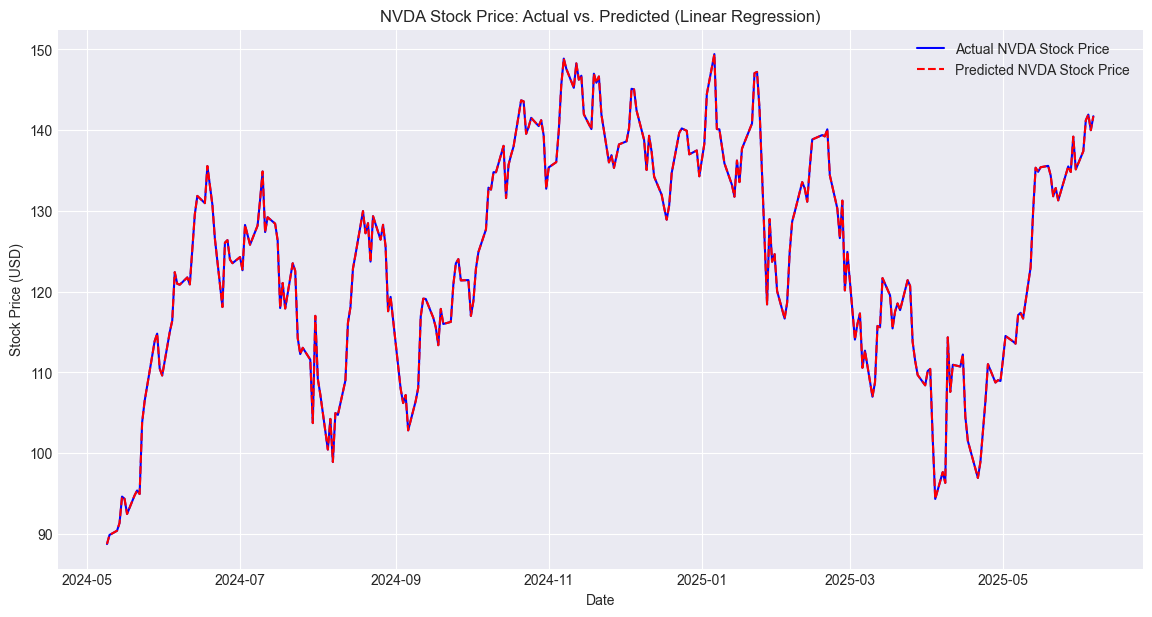

In [73]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual NVDA Stock Price', color='blue')
plt.plot(y_test.index, predictions, label='Predicted NVDA Stock Price', color='red', linestyle='--')
plt.title('NVDA Stock Price: Actual vs. Predicted (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

![Graph-ActualvsPredCurrentday](output.png)

This graph highlights the data leakage of using the Open, Low, High, and Volume of the current day leading to perfect predictions.

# Next Day Prediction
An attempt at a more accurate model. Will drop current day Close. Shift target variable to the next day.and not considering Open, Volume, High, Low of current day.

In [74]:
# Create new target variable for next day Close
data['Next_Day_Close'] = data['Close'].shift(-1)
print("\nNew target variable 'Next_Day_Close' added:")
print(data.head())





New target variable 'Next_Day_Close' added:
Price           Open      High       Low     Close     Volume Close_Lag_1  \
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA               
Date                                                                        
2020-01-30  6.014480  6.132475  5.959466  6.119032  290504000    6.112311   
2020-01-31  6.073228  6.085176  5.843711  5.885532  370420000    6.119032   
2020-02-03  5.867360  6.002033  5.861137  5.982617  255564000    5.885532   
2020-02-04  6.124509  6.171059  6.074473  6.151891  271544000    5.982617   
2020-02-05  6.272873  6.283080  6.158862  6.242255  208220000    6.151891   

Price      Close_Lag_2 Close_Lag_3 Close_Lag_4 Close_Lag_5  ... Close_Lag_8  \
Ticker                                                      ...               
Date                                                        ...               
2020-01-30    6.172802    5.979381    6.235285    6.294530  ...    6.205411   
2020-01-31    6.112311

In [75]:
# Drop last row get rid of NaN in 'Next_Day_Close' and create new target variable
X = data.drop(['Close', 'Next_Day_Close'], axis=1) 
y = data['Next_Day_Close'] 


# Drop the last row to avoid NaN values in features and target
X = X.iloc[:-1] 
y = y.iloc[:-1] 




/var/folders/gd/f73fsvbs7qg5p3qr59tjhvz80000gn/T/ipykernel_51689/343187620.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = data.drop(['Close', 'Next_Day_Close'], axis=1)


# Data Splitting

In [76]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Features (X_train) shape: {X_train.shape}")
print(f"Target (y_train) shape: {y_train.shape}")
print(f"Features (X_test) shape: {X_test.shape}")
print(f"Target (y_test) shape: {y_test.shape}")



Training set size: 1076 samples
Testing set size: 269 samples
Features (X_train) shape: (1076, 20)
Target (y_train) shape: (1076,)
Features (X_test) shape: (269, 20)
Target (y_test) shape: (269,)


# Linear Regression

In [77]:
# Define the Linear Regression model
model = LinearRegression()

# Train the model using the training data
print("\nTraining the Linear Regression model")
model.fit(X_train, y_train)


Training the Linear Regression model


LinearRegression()

# Prediction

In [78]:
print("\nMaking predictions")
predictions = model.predict(X_test)


Making predictions


# Coefficients of Linear Regression

In [84]:
print("\nLinear Regression Model Coefficients:")

for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"Intercept: {model.intercept_:.4f}")


Linear Regression Model Coefficients:
('Open', 'NVDA'): 0.8576
('High', 'NVDA'): 0.0480
('Low', 'NVDA'): -0.0355
('Volume', 'NVDA'): -0.0000
('Close_Lag_1', ''): -0.1439
('Close_Lag_2', ''): 0.0580
('Close_Lag_3', ''): -0.1068
('Close_Lag_4', ''): 0.0010
('Close_Lag_5', ''): -0.0790
('Close_Lag_6', ''): 0.0632
('Close_Lag_7', ''): -0.0225
('Close_Lag_8', ''): -0.0478
('Close_Lag_9', ''): -0.0792
('Close_Lag_10', ''): 0.0479
('Rolling_Mean_5', ''): 0.3140
('Rolling_Mean_10', ''): 0.1405
('Rolling_Mean_20', ''): -0.0172
('Daily_Change', ''): 0.9043
('High_Low_Diff', ''): 0.0834
('Volume_Change', ''): 0.0132
Intercept: 0.0258


# Evaluate Model 

In [85]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, predictions)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 21.23
Root Mean Squared Error (RMSE): 4.61
R-squared (R2) Score: 0.89


In [92]:
print(f"Next Day Close Prediction as of 6/7/2025 ${predictions[-1]}")

Next Day Close Prediction as of 6/7/2025 $140.24038098156922


# Findings
My findings are that my evaluations are no longer 'perfect' which shows some data leakage has been addressed from using same day data to predict a current day. RMSE shows my predictions are about $4.61 off and my R2 is .89 which show linear fit between features and close.

According to the regression coefficients Open and Daily change are still the most impactful features. 

My plot is no longer exact either.

# Visualization

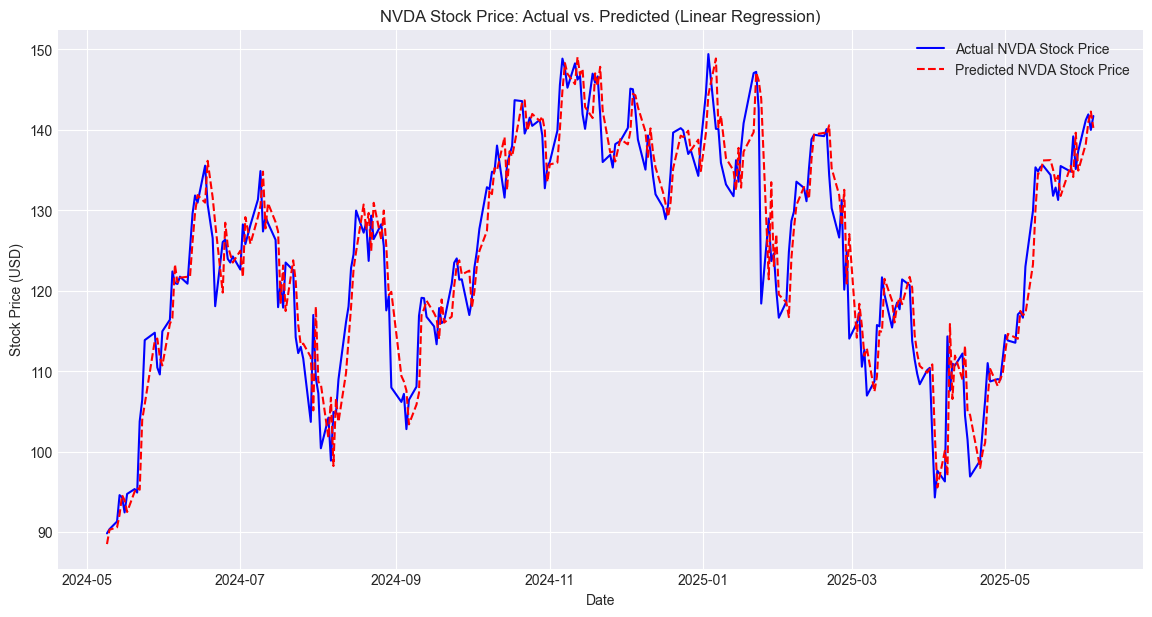

In [87]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual NVDA Stock Price', color='blue')
plt.plot(y_test.index, predictions, label='Predicted NVDA Stock Price', color='red', linestyle='--')
plt.title('NVDA Stock Price: Actual vs. Predicted (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

![Next Day](nextday-output.png)